In [45]:
#importing os library
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
#reading Pos_Data and checking the first 5 rows
pos = pd.read_excel("pos_sample.xlsx")
pos.head()

,SKU_ID,Page_traffic,Units_sold,Segment
0,SKU1011,4119.0,697,Makeup
1,SKU1011,4074.0,1027,Makeup
2,SKU1011,4897.0,1037,Makeup
3,SKU1011,4783.0,1184,Makeup
4,SKU1011,3789.0,876,Makeup


In [47]:
# view the general information of the data
pos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3993 entries, 0 to 3992
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SKU_ID        3993 non-null   object 
 1   Page_traffic  3993 non-null   float64
 2   Units_sold    3993 non-null   int64  
 3   Segment       3993 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 124.9+ KB


In [48]:
#list the unique values in the Segment column
print("Unique values in the Segment column:", pos['Segment'].unique())

Unique values in the Segment column: ['Makeup' 'Skincare' 'Hair Care']


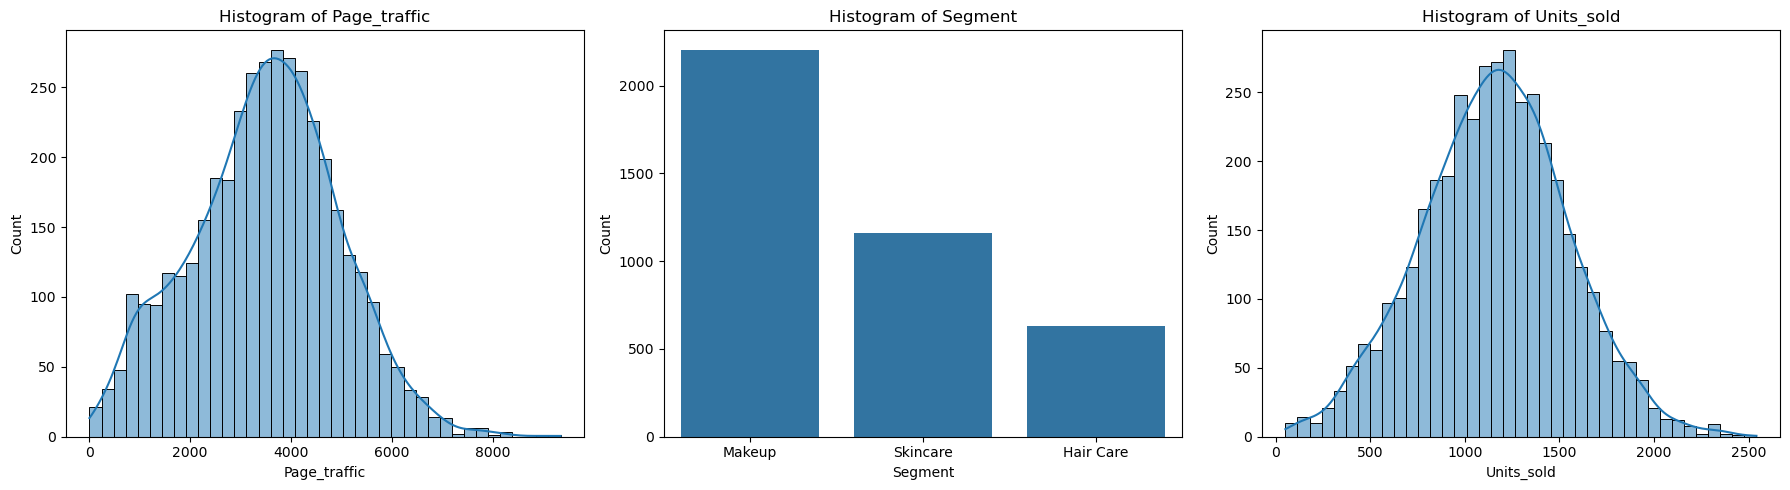

In [49]:
# Set up the figure and axes
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Plot histogram for Page_traffic
sns.histplot(pos['Page_traffic'], kde=True, ax=axs[0])
axs[0].set_title('Histogram of Page_traffic')
axs[0].set_xlabel('Page_traffic')
axs[0].set_ylabel('Count')

# Plot histogram for Segment (countplot since it’s categorical)
sns.countplot(x=pos['Segment'], ax=axs[1])
axs[1].set_title('Histogram of Segment')
axs[1].set_xlabel('Segment')
axs[1].set_ylabel('Count')

# Plot histogram for Units_sold
sns.histplot(pos['Units_sold'], kde=True, ax=axs[2])
axs[2].set_title('Histogram of Units_sold')
axs[2].set_xlabel('Units_sold')
axs[2].set_ylabel('Count')

# Display the plot
plt.tight_layout()
plt.show()

# Steps we will follow to build a model for doing prediction

1. We will begin with dividing the data set into train and valid.
2. Then we will perform mean based and rule based prediction
3. And finally we will evaluate models correctness using MAE

# Step 1: Divide the dataset

In [50]:
#import train_test_split to split data into pos_train and pos_valid
from sklearn.model_selection import train_test_split

In [51]:
# Split the pos DataFrame into training and validation sets
pos_train, pos_valid = train_test_split(pos, test_size=0.2, random_state=9)

# Check the shape of both the training and validation sets
pos_train.shape, pos_valid.shape

((3194, 4), (799, 4))

# Step 2: Perform Prediction (Mean Based Prediction)

In [52]:
#overall mean of Units_sold for train data and converting it into integers since units sold cannot be decimals
units_sold_mean = int(pos_train['Units_sold'].mean())

In [53]:
#creating a new column- "Pred_Mean_Units_Sold" in the pos_valid dataframe and assigning the mean of Units_sold from train data
pos_valid['Pred_Mean_Units_Sold']= units_sold_mean
pos_valid.head()

,SKU_ID,Page_traffic,Units_sold,Segment,Pred_Mean_Units_Sold
2137,SKU252,3202.0,1303,Skincare,1157
118,SKU1056,4423.0,1586,Makeup,1157
903,SKU145,4562.0,1522,Hair Care,1157
1966,SKU199,4775.0,1495,Makeup,1157
2335,SKU271,2953.0,1138,Makeup,1157


# Step 3: Evaluate Prediction

In [54]:
#import mean_absolute_error from sklearn.metrics
from sklearn.metrics import mean_absolute_error

In [56]:
# Calculate the Mean Absolute Error between actual and predicted values of Mean-based prediction method
mae_mean_model = mean_absolute_error(pos_valid['Units_sold'], pos_valid['Pred_Mean_Units_Sold'])
mae_mean_model

307.0475594493116

# Approach 2 (Rule Based Prediction)

# Step 2: Perform Prediction

In [32]:
#calculate mean of Units_sold for pos_train by segment
mean_units_sold_by_segment = pos_train.groupby(by = 'Segment').mean(numeric_only =True)["Units_sold"].astype(int)
mean_units_sold_by_segment

Segment
Hair Care    1166
Makeup       1152
Skincare     1161
Name: Units_sold, dtype: int32

In [60]:
# Apply the segment-wise mean as predictions for the validation set
pos_valid['Pred_Segment_Mean_Units_Sold'] = pos_valid['Segment'].map(mean_units_sold_by_segment)
pos_valid

,SKU_ID,Page_traffic,Units_sold,Segment,Pred_Mean_Units_Sold,Pred_Segment_Mean_Units_Sold
2137,SKU252,3202.0,1303,Skincare,1157,1161
118,SKU1056,4423.0,1586,Makeup,1157,1152
903,SKU145,4562.0,1522,Hair Care,1157,1166
1966,SKU199,4775.0,1495,Makeup,1157,1152
2335,SKU271,2953.0,1138,Makeup,1157,1152
...,...,...,...,...,...,...
3963,SKU961,1063.0,506,Hair Care,1157,1166
777,SKU1393,4723.0,1786,Makeup,1157,1152
2658,SKU469,1411.0,892,Makeup,1157,1152
2076,SKU25,4611.0,1305,Makeup,1157,1152


# Step 3: Evaluate Prediction

In [34]:
#MAE of segment wise Units_sold mean from pos_train and actual values of 'Units_sold' from pos_valid
mean_absolute_error(pos_valid['Units_sold'],pos_valid['Pred_Segment_Mean_Units_Sold'])

306.4267834793492